# E-Commerce Reviews

**Objective**: Predict custumer product grades by their reviews at a ecommerce website.

**Data provided**: train_df.csv
- Ecommerce company data table with over 130,000 customer reviews. The database provides information about the reviewer's profile, such as gender, age and geographic location as well.
- y label column: overall_rating

In [2]:
from src import my_module
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

my_module.helper_function()

hello_world


# . Resolução

## Imports

In [3]:
from unicodedata import normalize
import requests
import regex as re
import datetime
from scipy.stats import randint, loguniform

In [4]:
import pandas_profiling
from wordcloud import WordCloud

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [6]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [77]:
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
import pickle

## EDA

In [7]:
df=pd.read_csv(my_module.train_df_path())

In [8]:
df.head()

index      submission_date  \
0   95851  2018-04-20 11:56:28   
1  115536  2018-05-10 18:56:36   
2    1254  2018-01-02 07:02:48   
3   86792  2018-04-11 16:45:45   
4   35543  2018-02-02 16:30:23   

                                         reviewer_id product_id  \
0  c951f3a4511b554a1f34330903c320f34cfccbdf8de357...  111586438   
1  21da6d1c6d022a5c67da402d3082c7c438660f4252b7c3...   19399940   
2  eaf2f059cbb702e377bf95ac998aa4365f851937a3b419...   22747780   
3  e5bb0709d14bc4a00aeaeb1f111616e69f57239dff7da6...   22857850   
4  420a3ab1adf3c6010d491c8def04e19b1439ed01df7038...  132207708   

                                        product_name product_brand  \
0     Depilador Elétrico Philips Satinelle HP6403/30       philips   
1  Hidratante Corporal Dior Addict Body Mist Femi...           NaN   
2  Controle Com Fio Para Xbox 360 Slim / Fat E Pc...           NaN   
3  Kit Edredom + Lençol Aconchego Dupla Face Casa...           NaN   
4  Smartphone Motorola Moto E4 Dual Chip Android ...      motorola   

         site_category_lv1   site_category_lv2  \
0      Beleza e Perfumaria           Depilação   
1      Beleza e Perfumaria  Tratamento de Pele   
2                    Games            Xbox 360   
3       Cama, Mesa e Banho             Edredom   
4  Celulares e Smartphones          Smartphone   

                            review_title recommend_to_a_friend  \
0                              Depilador                   Yes   
1                         Cheiro de rica                   Yes   
2                            Bom produto                   Yes   
3  Nao recebi onprofuto e nem satisfacao                    No   
4                   Excelente aquisição!                   Yes   

                                         review_text  reviewer_birth_year  \
0  Muito eficiente e prático! Depilação rápida em...               1978.0   
1  Adoro o perfume que fica na pele, ele não é um...               1986.0   
2  funciona o que é importante bom produto o text...               1978.0   
3  Gostaria de saber da minha entrega ate hoje na...               1969.0   
4  Entrega super rápida!  Quando da compra tive c...               1965.0   

  reviewer_gender reviewer_state  overall_rating  
0               F             ES               5  
1               F             SP               5  
2               M             ES               3  
3               F             RJ               1  
4               M             PE               4

In [9]:
df.shape

(105898, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105898 entries, 0 to 105897
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  105898 non-null  int64  
 1   submission_date        105898 non-null  object 
 2   reviewer_id            105898 non-null  object 
 3   product_id             105898 non-null  object 
 4   product_name           105833 non-null  object 
 5   product_brand          32704 non-null   object 
 6   site_category_lv1      105895 non-null  object 
 7   site_category_lv2      102686 non-null  object 
 8   review_title           105898 non-null  object 
 9   recommend_to_a_friend  105888 non-null  object 
 10  review_text            105898 non-null  object 
 11  reviewer_birth_year    101105 non-null  float64
 12  reviewer_gender        102582 non-null  object 
 13  reviewer_state         102691 non-null  object 
 14  overall_rating         105898 non-nu

In [12]:
report = pandas_profiling.ProfileReport(df)

In [13]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Analysis  of texts columns

#### wordcloud_review_title 

In [14]:
wordcloud_review_title = WordCloud().generate(' '.join(df['review_title']))

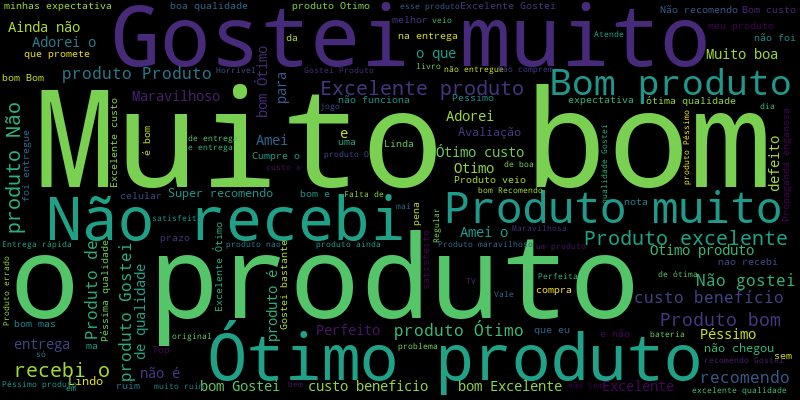

In [15]:
wordcloud_review_title.scale=2
wordcloud_review_title.to_image()

#### wordcloud_review_text

In [16]:
wordcloud_review_text = WordCloud().generate(' '.join(df['review_text']))

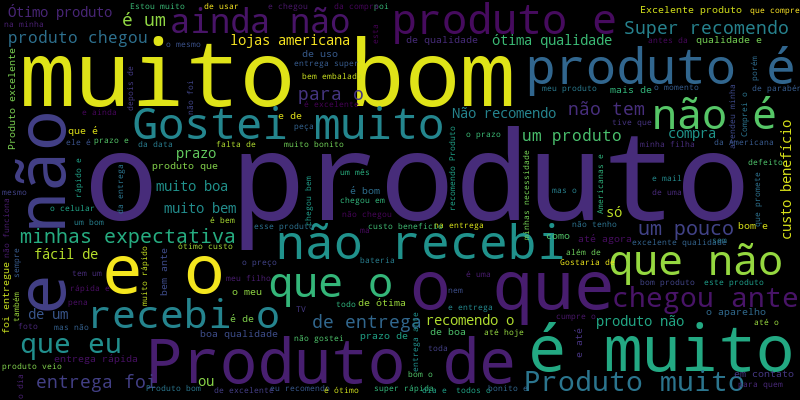

In [17]:
wordcloud_review_text.scale=2
wordcloud_review_text.to_image()

#### wordcloud_product_name

In [18]:
wordcloud_product_name = WordCloud().generate(' '.join(df['product_name'].fillna('vazio')))

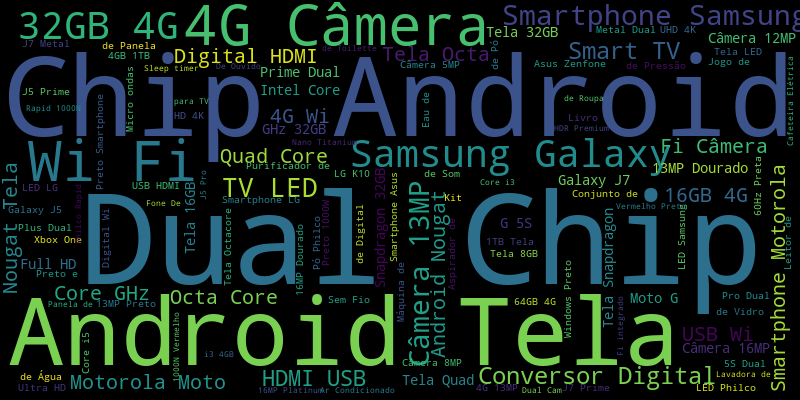

In [19]:
wordcloud_product_name.scale=2
wordcloud_product_name.to_image()

#### wordcloud_product_brand 

In [20]:
wordcloud_product_brand = WordCloud().generate(' '.join(df['product_brand'].fillna('vazio')))

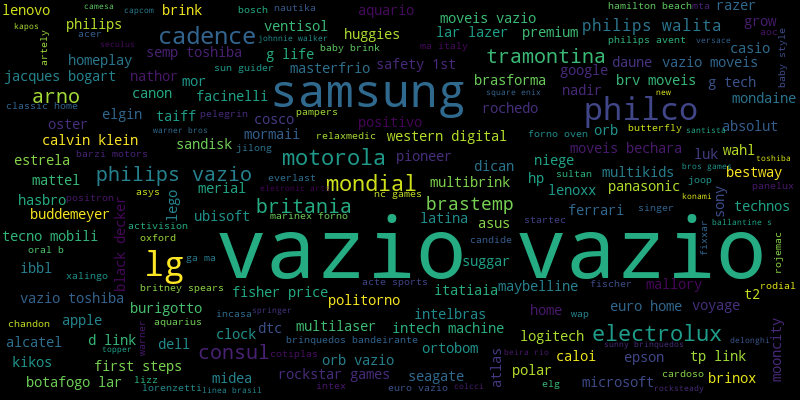

In [21]:
wordcloud_product_brand.scale=2
wordcloud_product_brand.to_image()

In [615]:
df=df.drop('product_brand',axis=1)

#### wordcloud_category_lv1

In [22]:
wordcloud_site_category_lv1 = WordCloud().generate(' '.join(df['site_category_lv1'].fillna('vazio')))

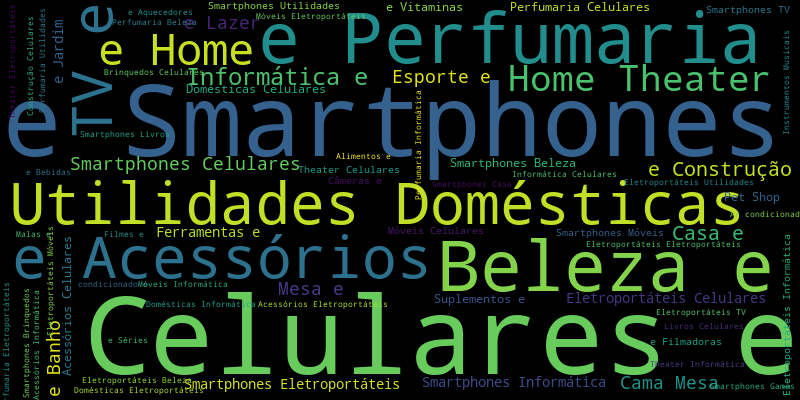

In [23]:
wordcloud_site_category_lv1.scale=2
wordcloud_site_category_lv1.to_image()

#### wordcloud_category_lv2

In [24]:
wordcloud_site_category_lv2 = WordCloud().generate(' '.join(df['site_category_lv2'].fillna('vazio')))

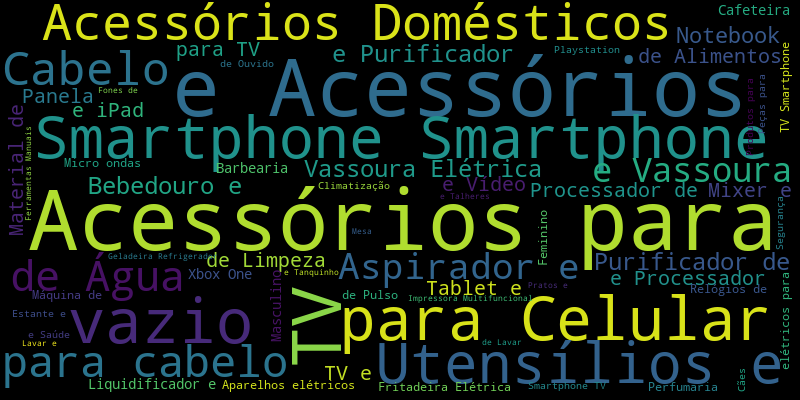

In [25]:
wordcloud_site_category_lv2.scale=2
wordcloud_site_category_lv2.to_image()

## Data Prep

### Text Prep

In [26]:
def retorna_stopwords(url):
    r=requests.get(urlstopwords)
    lista_stopwords=list(map(lambda x: x.replace(' ',''),r.text.split('\n')))
    return lista_stopwords

In [27]:
def remover_stop_words(x):
    x=[word for word in x.split() if word not in lista_stopwords]
    x=' '.join(x)
    return x

In [28]:
urlstopwords=r"https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt"

In [29]:
lista_stopwords=retorna_stopwords(urlstopwords)

In [30]:
for coluna in df.columns:
    if df[coluna].dtype=='object' and 'date' not in coluna and 'id' not in coluna:
        #Input de missings, para alta cardinalidade inputo a palavra vazio e baixa cardinalidade a moda
        if df[coluna].nunique()>500:
            df[coluna]=df[coluna].fillna('vazio')
        else:
            df[coluna]=df[coluna].fillna(df[coluna].mode()[0])
        #Remove caracteres especiais e acentuação
        df[coluna]=df[coluna].str.normalize('NFKD').str.encode('ASCII','ignore').str.decode('ASCII')
        df[coluna]=df[coluna].map(lambda x : re.sub(r'[^\w\s]', '', x))
        #Textos para minúscula
        df[coluna]=df[coluna].str.lower()
        #Remove stop words
        df[coluna]=df[coluna].map(remover_stop_words)
        #Transforma números na tag NUM
        df[coluna]=df[coluna].apply(lambda x: re.sub(r'\d+', 'NUM', x))

#### results of review_text

In [31]:
wordcloud_review_text2 = WordCloud().generate(' '.join(df['review_text']))

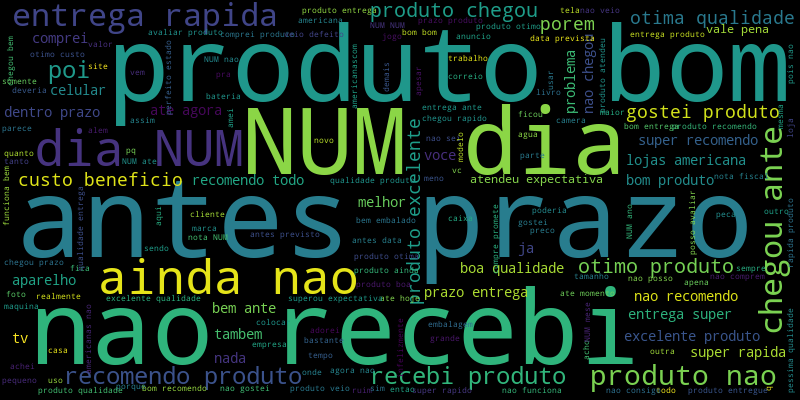

In [32]:
wordcloud_review_text2.scale=2
wordcloud_review_text2.to_image()

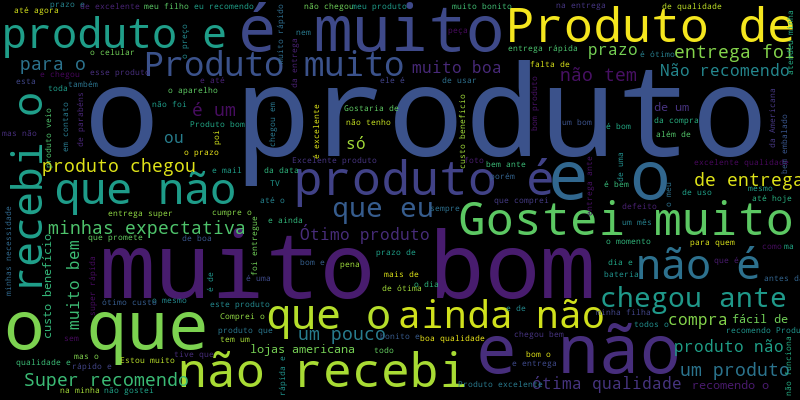

#### results of  review_title

In [33]:
wordcloud_review_text2 = WordCloud().generate(' '.join(df['review_title']))

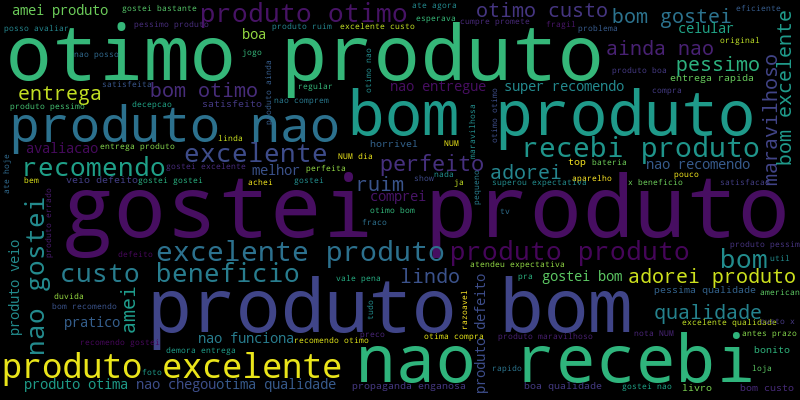

In [34]:
wordcloud_review_text2.scale=2
wordcloud_review_text2.to_image()

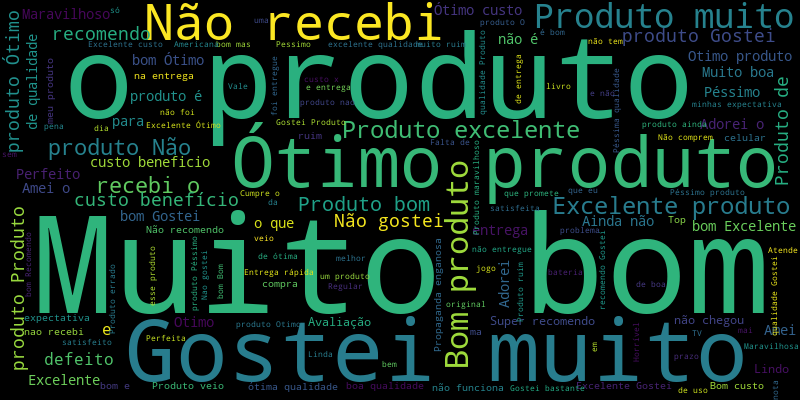

### Age prep

In [35]:
def trataidade(colunaano):
    return datetime.datetime.now().year-colunaano

In [36]:
df.reviewer_birth_year=trataidade(df.reviewer_birth_year)

In [37]:
df=df.rename(columns={'reviewer_birth_year':'age'})

### Recommend Column Prep

In [38]:
def tratarecommend(colunarecommend):
    return pd.get_dummies(colunarecommend,prefix='recommend_to_a_friend',drop_first  =True)

In [39]:
df.recommend_to_a_friend=tratarecommend(df.recommend_to_a_friend)

### Gender Prep

In [40]:
def tratargender(colunagender):
    return pd.get_dummies(colunagender,prefix='reviewer_gender',drop_first  =True)

In [41]:
df.reviewer_gender=tratargender(df.reviewer_gender)

### State Prep

In [42]:
def tratarstate(colunastate):
    return pd.get_dummies(colunastate,prefix='reviewer_state')

In [43]:
df=pd.concat([df,tratarstate(df.reviewer_state)],axis=1)

In [44]:
df=df.drop('reviewer_state',axis=1)

### Out-of-Time

In [268]:
df.submission_date.str[:7].value_counts().sort_index()

2018-01    27691
2018-02     9255
2018-03    23892
2018-04    23942
2018-05    21118
Name: submission_date, dtype: int64

In [286]:
dfplotdatas=df.submission_date.str[:7].value_counts().sort_index().reset_index().rename(columns={'index':'dia','submission_date':'reviews'})

In [277]:
dfplotdatas

dia  submission_date
0    2018-01-01              583
1    2018-01-02             1396
2    2018-01-03             1361
3    2018-01-04             1238
4    2018-01-05             1204
..          ...              ...
146  2018-05-27              376
147  2018-05-28              551
148  2018-05-29              580
149  2018-05-30              496
150  2018-05-31              384

[151 rows x 2 columns]

In [280]:
dfplotdatas

dia  reviews
0    2018-01-01      583
1    2018-01-02     1396
2    2018-01-03     1361
3    2018-01-04     1238
4    2018-01-05     1204
..          ...      ...
146  2018-05-27      376
147  2018-05-28      551
148  2018-05-29      580
149  2018-05-30      496
150  2018-05-31      384

[151 rows x 2 columns]

In [283]:
dfplotdatas

dia  reviews
0    2018-01-01      583
1    2018-01-02     1396
2    2018-01-03     1361
3    2018-01-04     1238
4    2018-01-05     1204
..          ...      ...
146  2018-05-27      376
147  2018-05-28      551
148  2018-05-29      580
149  2018-05-30      496
150  2018-05-31      384

[151 rows x 2 columns]

<AxesSubplot:xlabel='dia', ylabel='reviews'>

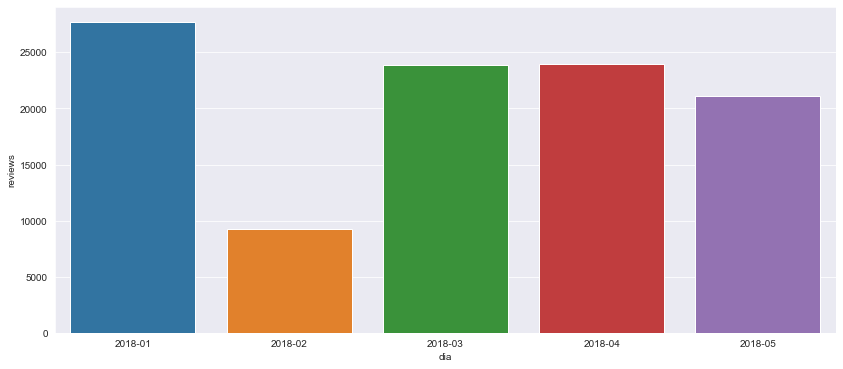

In [289]:
fig,ax=plt.subplots(figsize=(14,6))
sns.barplot(data=dfplotdatas,x='dia',y='reviews',ax=ax)

In [292]:
def treino_teste(df):
    dftreino=df[df.submission_date<'2018-04-01']
    dfteste=df[df.submission_date>='2018-04-01']
    return dftreino.drop('overall_rating',axis=1), dfteste.drop('overall_rating',axis=1),dftreino['overall_rating'], dfteste['overall_rating']

# CountVectorizer + Naive Bayes  - just with review text

In [45]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(df.review_text)
X.shape

(105898, 55815)

In [46]:
y=df.overall_rating

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [48]:
modelo_nb = MultinomialNB()

In [49]:
modelo_nb.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_train_pred=modelo_nb.predict(X_train)

In [51]:
print('__TREINO__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.667
Recall                                      : 0.667
F1-Score                                    : 0.667

Precision Recall F1-Score Support Per Class : 
 (0.6667700243830249, 0.6667700243830249, 0.6667700243830249, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.72      0.92      0.81     14651
           2       0.77      0.28      0.41      4540
           3       0.60      0.34      0.43      8638
           4       0.60      0.43      0.50     17447
           5       0.67      0.86      0.75     25675

    accuracy                           0.67     70951
   macro avg       0.67      0.57      0.58     70951
weighted avg       0.66      0.67      0.64     70951



In [52]:
y_test_pred=modelo_nb.predict(X_test)

In [53]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.571
Recall                                      : 0.571
F1-Score                                    : 0.571

Precision Recall F1-Score Support Per Class : 
 (0.5712078289981972, 0.5712078289981972, 0.5712078289981972, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.69      0.88      0.77      7347
           2       0.29      0.11      0.16      2186
           3       0.35      0.20      0.26      4366
           4       0.41      0.29      0.34      8408
           5       0.61      0.78      0.69     12640

    accuracy                           0.57     34947
   macro avg       0.47      0.45      0.44     34947
weighted avg       0.53      0.57      0.54     34947



# TFIDF + Naive Bayes - just with review text

In [54]:
vectorizer = TfidfVectorizer(analyzer='word',
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))

In [55]:
fittedvectorizer = vectorizer.fit(df.review_text)

In [56]:
X = fittedvectorizer.transform(df.review_text)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [58]:
modelo_nb = MultinomialNB()

In [59]:
modelo_nb.fit(X_train, y_train)

MultinomialNB()

In [60]:
y_train_pred=modelo_nb.predict(X_train)

In [61]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.678
Recall                                      : 0.678
F1-Score                                    : 0.678

Precision Recall F1-Score Support Per Class : 
 (0.677707150004933, 0.677707150004933, 0.677707150004933, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.79      0.97      0.87     14651
           2       0.00      0.00      0.00      4540
           3       1.00      0.03      0.05      8638
           4       0.95      0.47      0.63     17447
           5       0.58      0.99      0.73     25675

    accuracy                           0.68     70951
   macro avg       0.66      0.49      0.46     70951
weighted avg       0.73      0.68      0.60     70951



C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
y_test_pred=modelo_nb.predict(X_test)

In [63]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.542
Recall                                      : 0.542
F1-Score                                    : 0.542

Precision Recall F1-Score Support Per Class : 
 (0.5415629381635048, 0.5415629381635048, 0.5415629381635048, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.74      0.85      0.80      7347
           2       0.00      0.00      0.00      2186
           3       0.80      0.00      0.00      4366
           4       0.47      0.03      0.06      8408
           5       0.48      0.98      0.64     12640

    accuracy                           0.54     34947
   macro avg       0.50      0.37      0.30     34947
weighted avg       0.54      0.54      0.41     34947



C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gusth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CountVectorizer + Lightgbm  - just with review text

In [64]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(df.review_text)
X.shape

(105898, 55815)

In [65]:
y=df.overall_rating

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [67]:
modelo_lgb=LGBMClassifier(random_state=42)

In [68]:
modelo_lgb.fit(X_train.astype(float), y_train)

LGBMClassifier()

In [69]:
y_train_pred=modelo_lgb.predict(X_train.astype(float))

In [70]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.623
Recall                                      : 0.623
F1-Score                                    : 0.623

Precision Recall F1-Score Support Per Class : 
 (0.6232329354061253, 0.6232329354061253, 0.6232329354061253, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.73      0.91      0.81     14651
           2       0.68      0.23      0.35      4540
           3       0.54      0.29      0.38      8638
           4       0.50      0.40      0.44     17447
           5       0.63      0.79      0.70     25675

    accuracy                           0.62     70951
   macro avg       0.61      0.52      0.54     70951
weighted avg       0.61      0.62      0.60     70951



In [71]:
y_test_pred=modelo_lgb.predict(X_test.astype(float))

In [72]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.584
Recall                                      : 0.584
F1-Score                                    : 0.584

Precision Recall F1-Score Support Per Class : 
 (0.5837410936561078, 0.5837410936561078, 0.5837410936561078, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.71      0.88      0.78      7347
           2       0.36      0.12      0.18      2186
           3       0.42      0.22      0.29      4366
           4       0.43      0.36      0.39      8408
           5       0.61      0.77      0.68     12640

    accuracy                           0.58     34947
   macro avg       0.51      0.47      0.46     34947
weighted avg       0.55      0.58      0.55     34947



# TFIDF + Lightgbm - just with review text

In [73]:
vectorizer = TfidfVectorizer(analyzer='word',
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))

In [74]:
fittedvectorizer = vectorizer.fit(df.review_text)

In [75]:
X = fittedvectorizer.transform(df.review_text)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [77]:
modelo_lgb=LGBMClassifier(random_state=42)

In [78]:
modelo_lgb.fit(X_train.astype(float), y_train)

LGBMClassifier()

In [79]:
y_train_pred=modelo_lgb.predict(X_train.astype(float))

In [80]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.648
Recall                                      : 0.648
F1-Score                                    : 0.648

Precision Recall F1-Score Support Per Class : 
 (0.6480246930980536, 0.6480246930980536, 0.6480246930980536, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.74      0.92      0.82     14651
           2       0.73      0.28      0.41      4540
           3       0.60      0.34      0.43      8638
           4       0.54      0.43      0.48     17447
           5       0.65      0.81      0.72     25675

    accuracy                           0.65     70951
   macro avg       0.65      0.56      0.57     70951
weighted avg       0.64      0.65      0.63     70951



In [81]:
y_test_pred=modelo_lgb.predict(X_test.astype(float))

In [82]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.588
Recall                                      : 0.588
F1-Score                                    : 0.588

Precision Recall F1-Score Support Per Class : 
 (0.5877471599851203, 0.5877471599851203, 0.5877471599851203, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.71      0.89      0.79      7347
           2       0.36      0.12      0.18      2186
           3       0.44      0.23      0.31      4366
           4       0.43      0.35      0.39      8408
           5       0.62      0.77      0.68     12640

    accuracy                           0.59     34947
   macro avg       0.51      0.47      0.47     34947
weighted avg       0.55      0.59      0.56     34947



# TFIDF + Lightgbm - with review text  and review title

In [83]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=2,
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))

In [84]:
fittedvectorizer_text = vectorizer.fit(df.review_text.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [85]:
fittedvectorizer_title = vectorizer.fit(df.review_title.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [86]:
X = fittedvectorizer_text.transform(df.review_text.apply(lambda x: re.sub(r'\d+', 'NUM', x)))+fittedvectorizer_title.transform(df.review_title.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [88]:
modelo_lgb=LGBMClassifier(random_state=42)

In [89]:
modelo_lgb.fit(X_train.astype(float), y_train)

LGBMClassifier()

In [90]:
y_train_pred=modelo_lgb.predict(X_train.astype(float))

In [91]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.695
Recall                                      : 0.695
F1-Score                                    : 0.695

Precision Recall F1-Score Support Per Class : 
 (0.6954236022043382, 0.6954236022043382, 0.6954236022043382, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.80      0.95      0.87     14651
           2       0.74      0.42      0.53      4540
           3       0.63      0.44      0.52      8638
           4       0.57      0.54      0.55     17447
           5       0.72      0.79      0.75     25675

    accuracy                           0.70     70951
   macro avg       0.69      0.63      0.65     70951
weighted avg       0.69      0.70      0.68     70951



In [92]:
y_test_pred=modelo_lgb.predict(X_test.astype(float))

In [93]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.635
Recall                                      : 0.635
F1-Score                                    : 0.635

Precision Recall F1-Score Support Per Class : 
 (0.6351904312244255, 0.6351904312244255, 0.6351904312244255, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.77      0.92      0.84      7347
           2       0.47      0.26      0.33      2186
           3       0.50      0.32      0.39      4366
           4       0.48      0.47      0.48      8408
           5       0.68      0.75      0.72     12640

    accuracy                           0.64     34947
   macro avg       0.58      0.54      0.55     34947
weighted avg       0.62      0.64      0.62     34947



In [94]:
pd.DataFrame(modelo_lgb.feature_importances_,fittedvectorizer_title.get_feature_names_out(),columns=['ft_importance']).sort_values('ft_importance',ascending=False).head(50)

ft_importance
nao                      272
excelente                263
otimo                    257
bom                      214
otima                    175
gostei                   154
recomendo                140
adorei                   137
ruim                     128
amei                     114
boa                      114
perfeito                 110
produto                  106
defeito                  105
veio                     101
pessimo                   97
maravilhoso               90
porem                     87
fraco                     84
nao recomendo             80
fragil                    75
bem                       72
super                     67
lindo                     65
pratico                   64
melhor                    63
pessima                   63
nao gostei                63
satisfeito                63
top                       60
custo                     59
atende                    58
satisfeita                56
produto bom               55
dinheiro                  53
pouco                     52
antes                     51
rapida                    51
regular                   51
achei                     51
horrivel                  51
poderia                   51
expectativas              50
decepcionada              50
bastante                  49
facil                     49
razoavel                  48
atendeu                   47
tudo                      45
so nao                    44

# TFIDF + Lightgbm - with review text, review title and refer_to_a_friend

In [95]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=2,
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))

In [96]:
fittedvectorizer_text = vectorizer.fit(df.review_text.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [97]:
fittedvectorizer_title = vectorizer.fit(df.review_title.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [98]:
X = fittedvectorizer_text.transform(df.review_text.apply(lambda x: re.sub(r'\d+', 'NUM', x)))+fittedvectorizer_title.transform(df.review_title.apply(lambda x: re.sub(r'\d+', 'NUM', x)))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [100]:
modelo_lgb=LGBMClassifier(random_state=42)

In [101]:
modelo_lgb.fit(X_train.astype(float), y_train)

LGBMClassifier()

In [102]:
y_train_pred=modelo_lgb.predict(X_train.astype(float))

In [103]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.695
Recall                                      : 0.695
F1-Score                                    : 0.695

Precision Recall F1-Score Support Per Class : 
 (0.6954236022043382, 0.6954236022043382, 0.6954236022043382, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.80      0.95      0.87     14651
           2       0.74      0.42      0.53      4540
           3       0.63      0.44      0.52      8638
           4       0.57      0.54      0.55     17447
           5       0.72      0.79      0.75     25675

    accuracy                           0.70     70951
   macro avg       0.69      0.63      0.65     70951
weighted avg       0.69      0.70      0.68     70951



In [104]:
y_test_pred=modelo_lgb.predict(X_test.astype(float))

In [105]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.635
Recall                                      : 0.635
F1-Score                                    : 0.635

Precision Recall F1-Score Support Per Class : 
 (0.6351904312244255, 0.6351904312244255, 0.6351904312244255, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.77      0.92      0.84      7347
           2       0.47      0.26      0.33      2186
           3       0.50      0.32      0.39      4366
           4       0.48      0.47      0.48      8408
           5       0.68      0.75      0.72     12640

    accuracy                           0.64     34947
   macro avg       0.58      0.54      0.55     34947
weighted avg       0.62      0.64      0.62     34947



In [106]:
pd.DataFrame(modelo_lgb.predict_proba(X_train.astype(float)),columns=['textprobarating'+str(i) for i in range(5)])

textprobarating0  textprobarating1  textprobarating2  textprobarating3  \
0              0.001185          0.000692          0.009291          0.211456   
1              0.564964          0.203210          0.123277          0.073173   
2              0.402589          0.078603          0.089437          0.211464   
3              0.000943          0.001189          0.010649          0.251802   
4              0.037266          0.032204          0.116113          0.330492   
...                 ...               ...               ...               ...   
70946          0.003066          0.003043          0.069480          0.565738   
70947          0.001772          0.002570          0.147523          0.580306   
70948          0.003870          0.004968          0.220265          0.475259   
70949          0.889573          0.054019          0.020725          0.016729   
70950          0.027181          0.021583          0.015770          0.052995   

       textprobarating4  
0              0.777376  
1              0.035376  
2              0.217908  
3              0.735418  
4              0.483925  
...                 ...  
70946          0.358673  
70947          0.267828  
70948          0.295637  
70949          0.018954  
70950          0.882471  

[70951 rows x 5 columns]

In [107]:
textprobarating=pd.DataFrame(modelo_lgb.predict_proba(X.astype(float)),columns=['textprobarating'+str(i) for i in range(5)])

In [108]:
X = pd.concat([textprobarating,df.recommend_to_a_friend],axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [110]:
modelo_lgb=LGBMClassifier(random_state=42)

In [111]:
modelo_lgb.fit(X_train.astype(float), y_train)

LGBMClassifier()

In [112]:
y_train_pred=modelo_lgb.predict(X_train.astype(float))

In [113]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.737
Recall                                      : 0.737
F1-Score                                    : 0.737

Precision Recall F1-Score Support Per Class : 
 (0.7373680427337176, 0.7373680427337176, 0.7373680427337175, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.89      0.95      0.92     14651
           2       0.75      0.62      0.68      4540
           3       0.67      0.57      0.61      8638
           4       0.62      0.57      0.59     17447
           5       0.74      0.80      0.77     25675

    accuracy                           0.74     70951
   macro avg       0.73      0.70      0.72     70951
weighted avg       0.73      0.74      0.73     70951



In [114]:
y_test_pred=modelo_lgb.predict(X_test.astype(float))

In [115]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.639
Recall                                      : 0.639
F1-Score                                    : 0.639

Precision Recall F1-Score Support Per Class : 
 (0.6391106532749592, 0.6391106532749592, 0.6391106532749592, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.83      0.90      0.87      7347
           2       0.44      0.36      0.39      2186
           3       0.46      0.37      0.41      4366
           4       0.48      0.46      0.47      8408
           5       0.69      0.75      0.72     12640

    accuracy                           0.64     34947
   macro avg       0.58      0.57      0.57     34947
weighted avg       0.63      0.64      0.63     34947



# TFIDF + Lightgbm - All features together

In [558]:
def vectorizer():
    return TfidfVectorizer(analyzer='word', min_df=2,
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))

In [561]:
X_train, X_test, y_train,y_test = treino_teste(df)

In [618]:
colunastexto=[coluna for coluna in df.columns if df[coluna].dtype=='object' and 'date' not in coluna and 'id' not in coluna]

In [641]:
pipetextos = Pipeline([('union', ColumnTransformer([('tfidf'+i,  vectorizer(), i) for i in colunastexto
                                                 ]))])

In [642]:
colunasnum=[coluna for coluna in df.columns if df[coluna].dtype!='object' and 'index' not in coluna and 'rating' not in coluna]

In [643]:
pipenum = Pipeline([('union', ColumnTransformer([('selector',  'passthrough', colunasnum)]))])

In [644]:
prep = FeatureUnion([('pipetextos',pipetextos),('pipenum',pipenum)],verbose=False)

In [645]:
model=LGBMClassifier(random_state=42,n_jobs=-1)

In [646]:
pipeline=Pipeline([('prep',prep),('model',model)])

In [647]:
param={
    'model__is_unbalance':[True],
    'model__n_estimators':randint(10,200),
    'model__num_leaves':randint(2,256),
    'model__max_depth':randint(1,15)
}

In [648]:
random_search = RandomizedSearchCV(pipeline,
                                   param,
                                   n_iter=10,
                                   scoring='roc_auc_ovr_weighted',
                                   n_jobs=1,
                                   cv=3,
                                   random_state=42,
                                   verbose=10,return_train_score=True)

In [649]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 1/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.939, test=0.875) total time=  47.6s
[CV 2/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 2/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.939, test=0.875) total time=  46.1s
[CV 3/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 3/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.940, test=0.870) total time=  44.6s
[CV 1/3; 2/10] START model__is_unbalance=True, model__max_depth=11, model__n_estimators=81, model__num_leave

[CV 3/3; 10/10] END model__is_unbalance=True, model__max_depth=1, model__n_estimators=67, model__num_leaves=23;, score=(train=0.847, test=0.837) total time=  14.0s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              FeatureUnion(transformer_list=[('pipetextos',
                                                                              Pipeline(steps=[('union',
                                                                                               ColumnTransformer(transformers=[('tfidfproduct_name',
                                                                                                                                TfidfVectorizer(min_df=2,
                                                                                                                                                ngram_range=(1,
                                                                                                                                                             3),
                                                                                                     

In [650]:
cvresults=pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score',ascending=False)

In [651]:
cvresults

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      50.080108      1.056108         2.953123        0.012758   
0      43.858573      1.392974         2.353838        0.167887   
5      52.654963      1.982296         3.036592        0.115935   
4      44.457897      0.967742         2.843749        0.025514   
1      41.085654      1.274306         2.336181        0.368987   
2      24.446990      0.558648         2.020832        0.029462   
8      27.547258      2.754927         2.609403        0.029868   
3      16.636429      0.153842         2.159676        0.234630   
6      15.089539      0.435056         2.453579        0.056248   
9      13.224971      0.699150         2.203127        0.266390   

  param_model__is_unbalance param_model__max_depth param_model__n_estimators  \
7                      True                      8                       167   
0                      True                      7                       189   
5                      True                      8                       161   
4                      True                      8                       126   
1                      True                     11                        81   
2                      True                      5                       112   
8                      True                      2                       197   
3                      True                      3                        84   
6                      True                      6                        62   
9                      True                      1                        67   

  param_model__num_leaves                                             params  \
7                      39  {'model__is_unbalance': True, 'model__max_dept...   
0                      94  {'model__is_unbalance': True, 'model__max_dept...   
5                     132  {'model__is_unbalance': True, 'model__max_dept...   
4                     101  {'model__is_unbalance': True, 'model__max_dept...   
1                     190  {'model__is_unbalance': True, 'model__max_dept...   
2                     123  {'model__is_unbalance': True, 'model__max_dept...   
8                      22  {'model__is_unbalance': True, 'model__max_dept...   
3                     204  {'model__is_unbalance': True, 'model__max_dept...   
6                       3  {'model__is_unbalance': True, 'model__max_dept...   
9                      23  {'model__is_unbalance': True, 'model__max_dept...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
7           0.875114           0.875462           0.869842         0.873473   
0           0.874879           0.875261           0.869775         0.873305   
5           0.874748           0.874976           0.869676         0.873134   
4           0.874534           0.874349           0.869188         0.872690   
1           0.873298           0.873034           0.867636         0.871323   
2           0.872588           0.872698           0.866307         0.870531   
8           0.870534           0.869723           0.863638         0.867965   
3           0.866823           0.865835           0.859345         0.864001   
6           0.856093           0.854258           0.847084         0.852478   
9           0.846029           0.843145           0.836731         0.841968   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7        0.002571                1            0.939599            0.940962   
0        0.002501                2            0.939032            0.939008   
5        0.002446                3            0.941770            0.942450   
4        0.002478                4            0.935337            0.935943   
1        0.002609                5            0.943871            0.945022   
2        0.002987                6            0.905983            0.906143   
8        0.003077                7            0.882044            0.882099   
3        

choosing trade-off over-fit vs score

In [652]:
paramtunado=cvresults.loc[8]['params']

In [653]:
paramtunado

{'model__is_unbalance': True,
 'model__max_depth': 2,
 'model__n_estimators': 197,
 'model__num_leaves': 22}

In [657]:
modelo_final=LGBMClassifier(random_state=42,n_jobs=-1,
                          is_unbalance= paramtunado['model__is_unbalance'], 
                          max_depth= paramtunado['model__max_depth'], 
                          n_estimators= paramtunado['model__n_estimators'], 
                          num_leaves= paramtunado['model__num_leaves']
                         )

In [658]:
pipelinfinal_final=Pipeline([('prep',prep),('model',modelo_final)])

In [661]:
pipelinfinal_final.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('pipetextos',
                                                 Pipeline(steps=[('union',
                                                                  ColumnTransformer(transformers=[('tfidfproduct_name',
                                                                                                   TfidfVectorizer(min_df=2,
                                                                                                                   ngram_range=(1,
                                                                                                                                3),
                                                                                                                   strip_accents='unicode'),
                                                                                                   'product_name'),
                                                                        

In [662]:
y_train_pred=pipelinfinal_final.predict(X_train)

In [663]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.635
Recall                                      : 0.646
F1-Score                                    : 0.616

Precision Recall F1-Score Support Per Class : 
 (0.6346402734350992, 0.646158650843223, 0.6157694865761149, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.77      0.97      0.86     12005
           2       0.73      0.14      0.23      3834
           3       0.56      0.26      0.36      7446
           4       0.51      0.47      0.49     15005
           5       0.65      0.80      0.72     22548

    accuracy                           0.65     60838
   macro avg       0.64      0.53      0.53     60838
weighted avg       0.63      0.65      0.62     60838



In [664]:
y_test_pred=pipelinfinal_final.predict(X_test)

In [665]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.612
Recall                                      : 0.632
F1-Score                                    : 0.600

Precision Recall F1-Score Support Per Class : 
 (0.6117215303345783, 0.6324900133155792, 0.6001337654445914, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.78      0.96      0.86      9993
           2       0.61      0.11      0.19      2892
           3       0.50      0.24      0.33      5558
           4       0.48      0.44      0.46     10850
           5       0.63      0.79      0.70     15767

    accuracy                           0.63     45060
   macro avg       0.60      0.51      0.51     45060
weighted avg       0.61      0.63      0.60     45060



# Final code with Data Prep and pipelines

In [8]:
X_train,X_test, y_train, y_test = my_module.treino_teste(pd.read_csv(my_module.train_df_path()))

In [37]:
pipetextos = Pipeline([('union', ColumnTransformer([('tfidf'+i,  TfidfVectorizer(analyzer='word', min_df=2,
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,3))
, i) for i in ['product_name',
 'site_category_lv1',
 'site_category_lv2',
 'review_title',
 'review_text']
]))])

In [38]:
pipenum = Pipeline([('union', ColumnTransformer([('selector',  'passthrough', ['recommend_to_a_friend',
 'age',
 'reviewer_gender',
 'reviewer_state_',
 'reviewer_state_ac',
 'reviewer_state_al',
 'reviewer_state_am',
 'reviewer_state_ap',
 'reviewer_state_ba',
 'reviewer_state_ce',
 'reviewer_state_df',
 'reviewer_state_es',
 'reviewer_state_go',
 'reviewer_state_ma',
 'reviewer_state_mg',
 'reviewer_state_ms',
 'reviewer_state_mt',
 'reviewer_state_pa',
 'reviewer_state_pb',
 'reviewer_state_pe',
 'reviewer_state_pi',
 'reviewer_state_pr',
 'reviewer_state_rj',
 'reviewer_state_rn',
 'reviewer_state_ro',
 'reviewer_state_rr',
 'reviewer_state_rs',
 'reviewer_state_sc',
 'reviewer_state_sp',
 'reviewer_state_to'])]))])

In [39]:
prep = FeatureUnion([('pipetextos',pipetextos),('pipenum',pipenum)],verbose=False)

In [40]:
model=LGBMClassifier(random_state=42,n_jobs=-1)

In [41]:
pipeline=Pipeline([('prep',prep),('model',model)])

In [43]:
param={
    'model__is_unbalance':[True],
    'model__n_estimators':randint(10,200),
    'model__num_leaves':randint(2,256),
    'model__max_depth':randint(1,15)
}

In [44]:
random_search = RandomizedSearchCV(pipeline,
                                   param,
                                   n_iter=10,
                                   scoring='roc_auc_ovr_weighted',
                                   n_jobs=1,
                                   cv=3,
                                   random_state=42,
                                   verbose=10,return_train_score=True)

In [45]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 1/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.938, test=0.874) total time=  45.7s
[CV 2/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 2/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.939, test=0.875) total time=  52.8s
[CV 3/3; 1/10] START model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94
[CV 3/3; 1/10] END model__is_unbalance=True, model__max_depth=7, model__n_estimators=189, model__num_leaves=94;, score=(train=0.939, test=0.870) total time=  50.7s
[CV 1/3; 2/10] START model__is_unbalance=True, model__max_depth=11, model__n_estimators=81, model__num_leave

[CV 3/3; 10/10] END model__is_unbalance=True, model__max_depth=1, model__n_estimators=67, model__num_leaves=23;, score=(train=0.845, test=0.836) total time=  16.0s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              FeatureUnion(transformer_list=[('pipetextos',
                                                                              Pipeline(steps=[('union',
                                                                                               ColumnTransformer(transformers=[('tfidfproduct_name',
                                                                                                                                TfidfVectorizer(min_df=2,
                                                                                                                                                ngram_range=(1,
                                                                                                                                                             3),
                                                                                                     

In [48]:
cvresults=pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score',ascending=False)

In [49]:
cvresults

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      50.514335      1.038425         2.946176        0.043795   
0      47.064083      2.736316         2.784268        0.240018   
5      51.147444      1.346292         3.044300        0.112268   
4      44.549617      0.505810         3.207710        0.504234   
1      47.752057      0.956013         2.783048        0.022715   
2      29.109479      0.808599         2.627998        0.037375   
8      25.385845      0.250652         2.606958        0.045301   
3      18.920956      0.126682         2.474149        0.007604   
6      14.974106      0.196115         2.382429        0.013922   
9      13.385763      0.167692         2.476798        0.115885   

  param_model__is_unbalance param_model__max_depth param_model__n_estimators  \
7                      True                      8                       167   
0                      True                      7                       189   
5                      True                      8                       161   
4                      True                      8                       126   
1                      True                     11                        81   
2                      True                      5                       112   
8                      True                      2                       197   
3                      True                      3                        84   
6                      True                      6                        62   
9                      True                      1                        67   

  param_model__num_leaves                                             params  \
7                      39  {'model__is_unbalance': True, 'model__max_dept...   
0                      94  {'model__is_unbalance': True, 'model__max_dept...   
5                     132  {'model__is_unbalance': True, 'model__max_dept...   
4                     101  {'model__is_unbalance': True, 'model__max_dept...   
1                     190  {'model__is_unbalance': True, 'model__max_dept...   
2                     123  {'model__is_unbalance': True, 'model__max_dept...   
8                      22  {'model__is_unbalance': True, 'model__max_dept...   
3                     204  {'model__is_unbalance': True, 'model__max_dept...   
6                       3  {'model__is_unbalance': True, 'model__max_dept...   
9                      23  {'model__is_unbalance': True, 'model__max_dept...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
7           0.874833           0.875112           0.869890         0.873278   
0           0.874418           0.874775           0.869698         0.872963   
5           0.874235           0.874614           0.869204         0.872684   
4           0.873662           0.873993           0.868433         0.872029   
1           0.872687           0.872916           0.867231         0.870945   
2           0.872366           0.872402           0.865836         0.870201   
8           0.869807           0.869692           0.863373         0.867624   
3           0.866103           0.865487           0.859170         0.863587   
6           0.855037           0.853656           0.846503         0.851732   
9           0.844647           0.842658           0.835625         0.840977   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7        0.002399                1            0.939481            0.939378   
0        0.002313                2            0.938146            0.938501   
5        0.002466                3            0.941638            0.942271   
4        0.002546                4            0.935195            0.935404   
1        0.002627                5            0.943667            0.943611   
2        0.003087                6            0.905264            0.905842   
8        0.003006                7            0.881615            0.882147   
3        

escolhendo tradeoff overfit vs score

In [68]:
paramtunado=cvresults.loc[8]['params']

In [69]:
paramtunado

{'model__is_unbalance': True,
 'model__max_depth': 2,
 'model__n_estimators': 197,
 'model__num_leaves': 22}

In [70]:
modelo_final=LGBMClassifier(random_state=42,n_jobs=-1,
                          is_unbalance= paramtunado['model__is_unbalance'], 
                          max_depth= paramtunado['model__max_depth'], 
                          n_estimators= paramtunado['model__n_estimators'], 
                          num_leaves= paramtunado['model__num_leaves']
                         )

In [71]:
pipelinfinal_final=Pipeline([('prep',prep),('model',modelo_final)])

In [72]:
pipelinfinal_final.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('pipetextos',
                                                 Pipeline(steps=[('union',
                                                                  ColumnTransformer(transformers=[('tfidfproduct_name',
                                                                                                   TfidfVectorizer(min_df=2,
                                                                                                                   ngram_range=(1,
                                                                                                                                3),
                                                                                                                   strip_accents='unicode'),
                                                                                                   'product_name'),
                                                                        

In [73]:
y_train_pred=pipelinfinal_final.predict(X_train)

In [74]:
print('__TRAIN__')
print('Precision                                   : %.3f'%precision_score(y_train, y_train_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_train, y_train_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_train, y_train_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_train, y_train_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_train, y_train_pred))

__TREINO__
Precision                                   : 0.635
Recall                                      : 0.647
F1-Score                                    : 0.616

Precision Recall F1-Score Support Per Class : 
 (0.6348891395229885, 0.6467996975574476, 0.6157863261396443, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.77      0.97      0.86     12005
           2       0.72      0.14      0.24      3834
           3       0.56      0.26      0.36      7446
           4       0.51      0.46      0.48     15005
           5       0.65      0.81      0.72     22548

    accuracy                           0.65     60838
   macro avg       0.64      0.53      0.53     60838
weighted avg       0.63      0.65      0.62     60838



In [75]:
y_test_pred=pipelinfinal_final.predict(X_test)

In [76]:
print('__TEST__')
print('Precision                                   : %.3f'%precision_score(y_test, y_test_pred, average='weighted'))
print('Recall                                      : %.3f'%recall_score(y_test, y_test_pred, average='weighted'))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_test_pred))

__TESTE__
Precision                                   : 0.611
Recall                                      : 0.632
F1-Score                                    : 0.599

Precision Recall F1-Score Support Per Class : 
 (0.6105425277908554, 0.6321127385707945, 0.5993228959307245, None)

Classification Report                       : 
              precision    recall  f1-score   support

           1       0.78      0.96      0.86      9993
           2       0.61      0.12      0.19      2892
           3       0.50      0.24      0.33      5558
           4       0.48      0.43      0.45     10850
           5       0.63      0.79      0.70     15767

    accuracy                           0.63     45060
   macro avg       0.60      0.51      0.51     45060
weighted avg       0.61      0.63      0.60     45060



In [79]:
with open("modelo.pkl","wb+") as f:
    pickle.dump(pipelinfinal_final,f)